# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.isnull().sum()


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [14]:
df['culmen_length_mm'].mean()

43.92192982456142

In [15]:
df['culmen_length_mm'].fillna(43.92,inplace=True)

In [16]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [17]:
df['culmen_depth_mm'].mean()

17.151169590643278

In [20]:
df['culmen_depth_mm'].fillna(17.15,inplace=True)

In [21]:
df['body_mass_g'].mean()

4201.754385964912

In [23]:
df['body_mass_g'].fillna(4201.75,inplace=True)

In [25]:
df['sex'].mode()

0    MALE
dtype: object

In [27]:
df['sex'].fillna("MALE",inplace=True)

In [28]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    2
body_mass_g          0
sex                  0
dtype: int64

In [29]:
df["flipper_length_mm"].mean()

200.91520467836258

In [30]:
df['flipper_length_mm'].fillna(200.91,inplace=True)

In [32]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

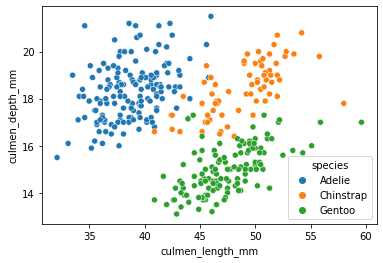

In [33]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species')
plt.show()

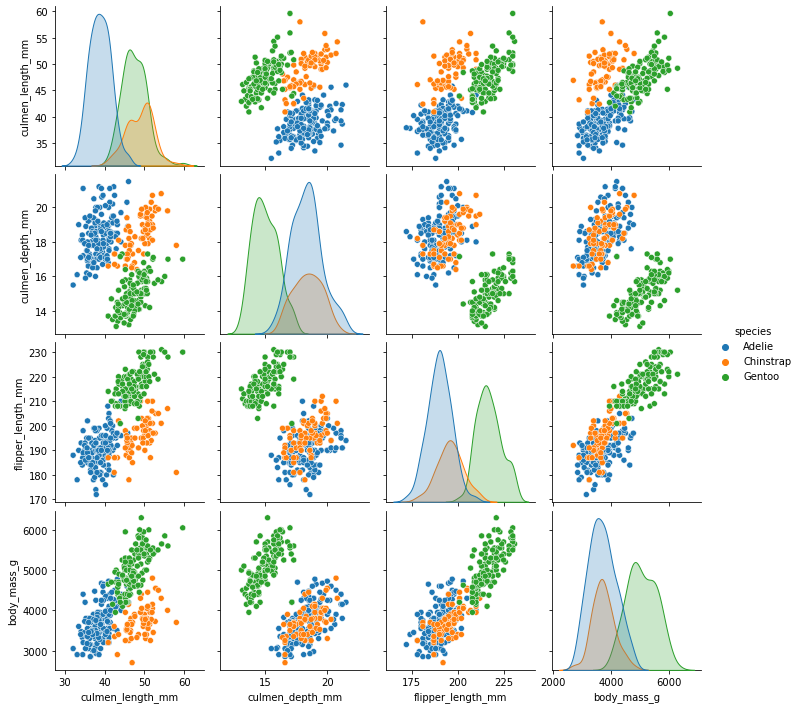

In [34]:
sns.pairplot(df,hue='species')
plt.show()

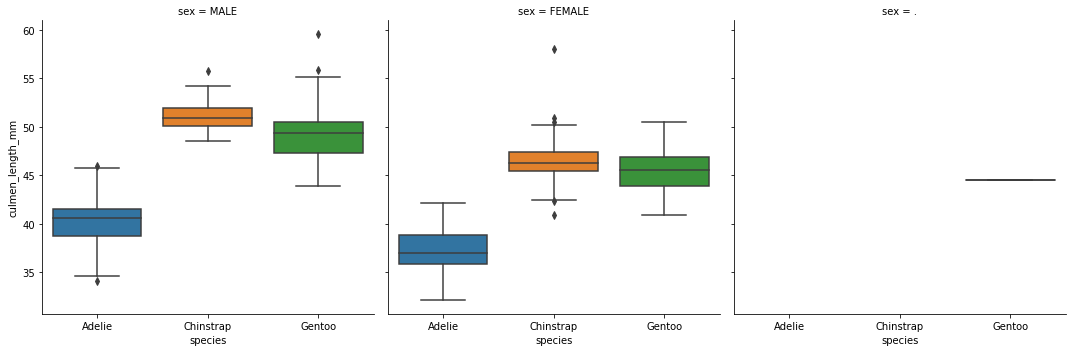

In [37]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex')
plt.show()

In [48]:
df=df.dropna()
df.shape

(344, 7)

In [49]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.10,18.70,181.00,3750.00,0,1,0,1
1,39.50,17.40,186.00,3800.00,0,1,1,0
2,40.30,18.00,195.00,3250.00,0,1,1,0
3,43.92,17.15,200.91,4201.75,0,1,0,1
4,36.70,19.30,193.00,3450.00,0,1,1,0
...,...,...,...,...,...,...,...,...
339,43.92,17.15,200.91,4201.75,0,0,0,1
340,46.80,14.30,215.00,4850.00,0,0,1,0
341,50.40,15.70,222.00,5750.00,0,0,0,1
342,45.20,14.80,212.00,5200.00,0,0,1,0


In [50]:
x=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [52]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
base_pred=model.predict(x_test)
y_pred=model.predict(x_train)

In [55]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [57]:
accuracy_score(y_train,y_pred)

1.0

In [58]:
accuracy_score(base_pred,y_test)

1.0

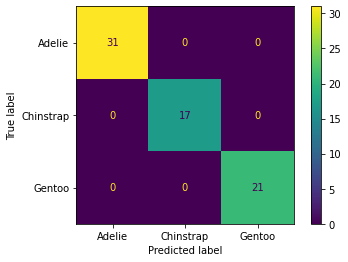

In [59]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [60]:
from sklearn.tree import plot_tree

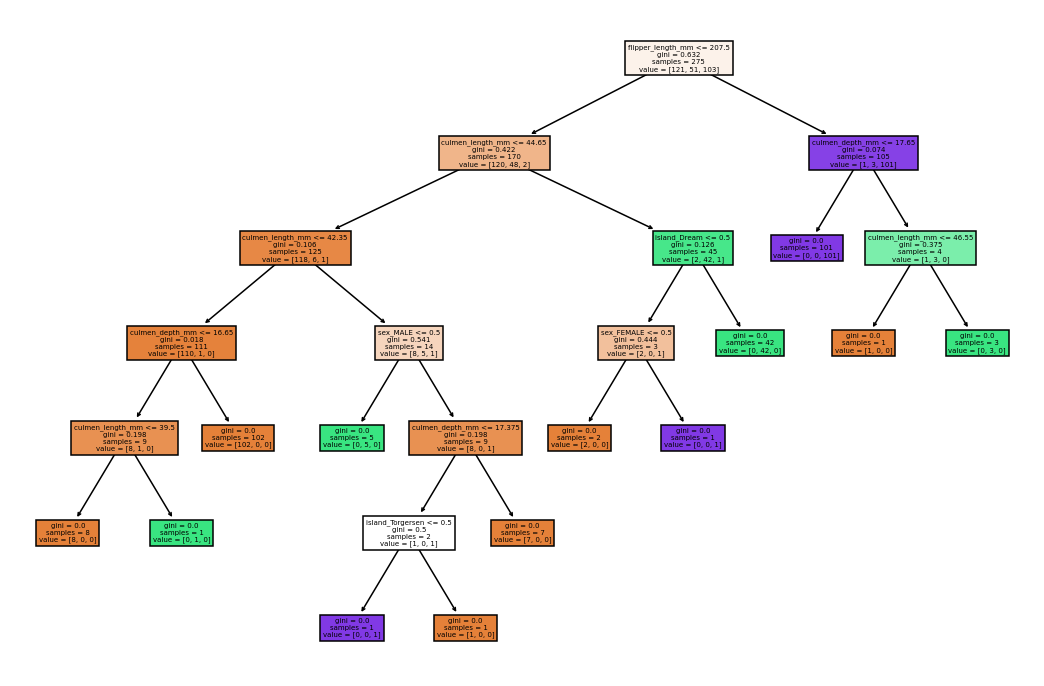

In [65]:
plt.figure(figsize=(12,8),dpi=110)
plot_tree(model,filled=True,feature_names=x.columns)
plt.show()

In [73]:
p_tree=DecisionTreeClassifier(max_depth=2)

In [76]:
def report_model(model):
    model.fit(x_train,y_train)
    model_preds=model.predict(x_test)
    pred_train=model.predict(x_train)
    print("Train Accuracy",accuracy_score(y_train,pred_train))
    print("Test Accuarcy",accuracy_score(y_test,model_preds))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True,feature_names=x.columns)

Train Accuracy 0.96
Test Accuarcy 0.9565217391304348


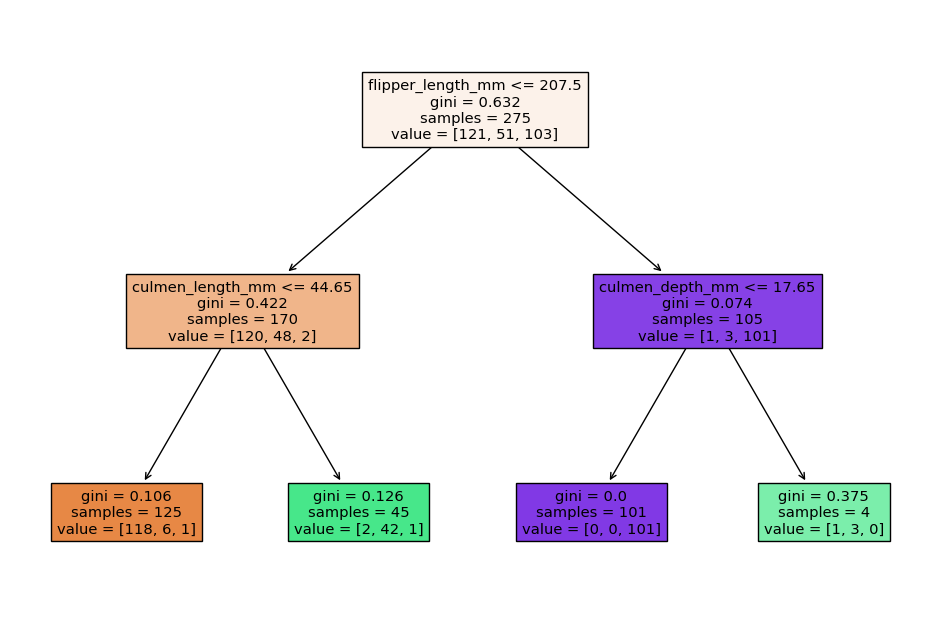

In [78]:
report_model(p_tree)

In [83]:
prun_t=DecisionTreeClassifier(max_leaf_nodes=4)

Train Accuracy 0.96
Test Accuarcy 0.9565217391304348


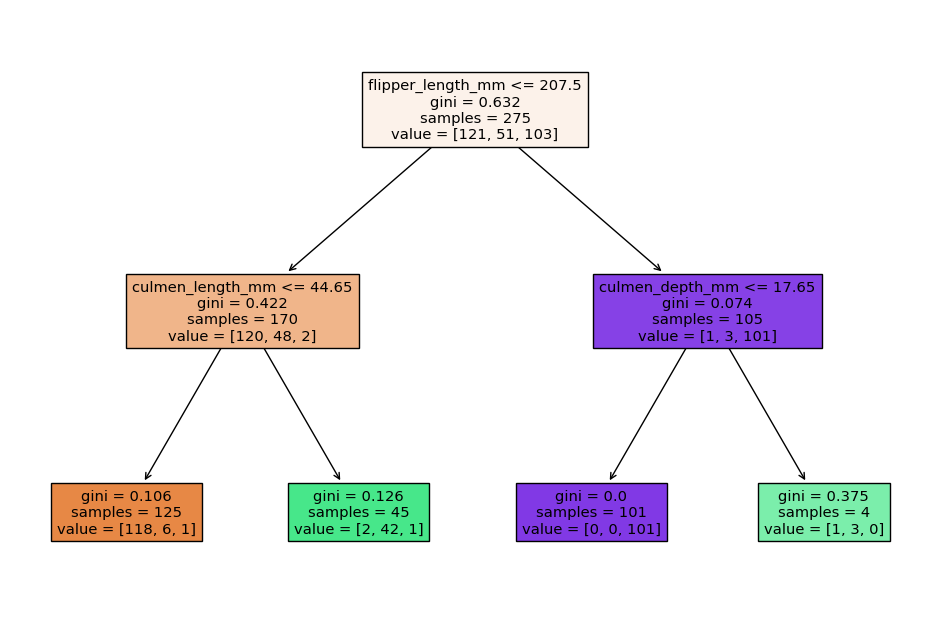

In [84]:
report_model(prun_t)